# **Classification using fully-connected neural networks.** 

## Table of Contents
- [Theory](#theory)
    - [Fully-connected Neural Networks](#fc_l)
    - [Activation Functions](#act)
    - [Optimizers](#opts)
    - [Losses](#loss)
    - [Training Flow](#clsf)
- [Python](#python)
- [PyTorch](#torch)
    - [Bulding and Training NNs](#btnn)
    - [The XOR problem](#xor)
    - [CIFAR-10 Classification](#cifar10)
    - [Speech Commands Classification](#speech)

## **Theory** <a class="anchor" id="theory"></a>

### Fully-connected Neural Networks <a class="anchor" id="fc_l"></a>

A **fully-connected neural network**, also known as a **dense neural network** or **multi-layer perceptron (MLP)**, is a fundamental type of artificial neural network. It is composed of layers of interconnected nodes, where each node in one layer is connected to every node in the next layer. The basic building block of a fully-connected neural network is the **fully-connected layer**.

#### Fully-Connected Layer

A fully-connected layer can be viewed as a function $f: \mathbb{R}^{N_{\text{in}}} \rightarrow \mathbb{R}^{N_{\text{out}}}$ parametrized by a matrix $ \mathbf{W} \in \mathbb{R}^{N_{\text{out}} \times N_{\text{in}}}$ and vector $ b \in \mathbb{R}^{N_{\text{out}}}$.


Mathematically, the output $ y \in \mathbb{R}^{N_{\text{out}}}$ of a fully-connected layer, given input vector $x \in \mathbb{R}^{N_{\text{in}}}$, can be expressed as: 

$$ y = f(x) = \mathbf{W}x + b $$

The weight matrix ($ \mathbf{W} $) encapsulates the connections between neurons in the current layer and the next layer. Each element $ w_{ij} $ in ($ \mathbf{W} $) corresponds to the weight of the connection between the $j^{th}$ neuron in the current layer and the $i^{th}$ neuron in the next layer.

The bias vector ( $b$ ) is added to the weighted sum to introduce an offset, allowing the model to learn translations, while also helping in handling non-zero inputs and enhancing expressiveness.

### Activation Functions <a class="anchor" id="act"></a>

Activation functions play a crucial role in neural networks by introducing non-linearities to the model. These non-linearities enable neural networks to learn and represent complex relationships in data.

Some common activation functions:

- **Sigmoid (Logistic) Function**: $$ \sigma(x) = {{1} \over {1 + e^{-x}}}, \,\, \sigma: \mathbb{R} \rightarrow \mathbb [0, 1] $$ Commonly used in the output layer of binary classification models. Vanishing gradient problems in deep networks.
- **Hyperbolic Tangent (tanh)**: $$ \sigma(x) = {{e^x - e^{-x}} \over {e^x + e^{-x}}}, \,\, \sigma: \mathbb{R} \rightarrow \mathbb [-1, 1] $$ Outputs values in the range (-1, 1). Similar to the sigmoid but with a symmetric range. May help mitigate issues related to vanishing gradients.
- **Rectified Linear Unit (ReLU)**: $$ \sigma(x) = \max(0, x), \,\, \sigma: \mathbb{R} \rightarrow \mathbb [0, \infty] $$ Addresses the vanishing gradient problem compared to traditional sigmoid and tanh. Widely used due to its simplicity, effectiveness and computational efficiency, along with its other variants: Leaky ReLU, PReLU, ELU, etc.
- **Softmax**: for a vector $z = (z_1, \dots, z_n)$, the outputs $y = (y_1, \dots, y_n)$ are defined as follows: $$ y_i = {{e^{z_i}} \over {\sum_{j=1}^n e^{z_j}}}, \,\, y_i \in [0, 1], \,\,\sum_{i=1}^n y_i = 1$$ 

The *Softmax* is mostly used as a final processing applied on the output vector to transform its contents into a *[discrete probability distribution](https://en.wikipedia.org/wiki/Probability_mass_function)*, in classification tasks, or to compute weighting values in the *[attention mechanism](https://proceedings.neurips.cc/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf)*.

### Neural Network Structure <a class="anchor" id="act"></a>

The function computed by a multi-layer fully-connected neural network with $m$ layers, represented by fully connected operators $ \{f_i\}_{i=1}^{m} $ and non-linear activation operators $ \{\sigma_i\}_{i=1}^{m-1} $, can be written as:

$$ T(x) = f_m \circ \sigma_{m-1} \circ f_{m-1} \circ \dots \circ \sigma_1 \circ f_1 (x)$$ which represents an alternation between linear and non-linear processing.

For $\sigma = I_d = diag([1, \dots, 1])$, the above function can be reduced to a single fully-connected layer, therefore a single linear layer is equivalent with multiple stacked linear layers.

### Optimizers <a class="anchor" id="opts"></a>

Optimization in neural networks refers to the process of adjusting the model's parameters during training to minimize some "error" function, taylored for the task at hand. The objective is to find the optimal set of weights and biases that allow the neural network to make accurate predictions on unseen data. The most common class of optimization algorithms are *gradient-based methods*.

**Stochastic Gradient Descent (SGD)** is a fundamental optimization algorithm widely used for training neural networks. It operates by iteratively updating the model parameters based on the gradients of the loss with respect to those parameters. 

```python
def sgd(loss, start_point, learning_rate, n_iterations):
    current_point = start_point
    # iteratively refine the optimum estimate    
    for i in range(n_iterations):
        # set the function to the current estimated optimum
        loss.update(current_point)
        # compute gradient of function w.r.t the current point
        current_gradient = loss.gradient(current_point)
        # update current optimum estimate
        current_point = current_point - learning_rate * current_gradient

    return current_point
```

In the above, the gradient w.r.t. to the input point is used to follow the direction of descent (or ascent, based on the `sign`). In the neural network case, the input data is fixed, and we're trying to find those weights and biases which best fit to our data. Therefore, we are learning the **input-output** function that minimizes the `loss`, given the desired input and output variables.

Some notable optimization algorithms, other than SGD, are: [Adam](https://arxiv.org/pdf/1412.6980.pdf%5D), [RMSprop](https://www.cs.toronto.edu/~hinton/coursera/lecture6/lec6.pdf), [LBFGS](https://en.wikipedia.org/wiki/Limited-memory_BFGS), [Nadam](https://cs229.stanford.edu/proj2015/054_report.pdf)

There are also algorithms that try to optimize the model's hyperparameters (e.g. number of layers, number of neurons): [Hyperband](https://www.jmlr.org/papers/volume18/16-558/16-558.pdf), [Progressive NAS](http://openaccess.thecvf.com/content_ECCV_2018/papers/Chenxi_Liu_Progressive_Neural_Architecture_ECCV_2018_paper.pdf) 

### Loss (Error/Cost) Functions <a class="anchor" id="loss"></a>

Loss functions quantify the difference between predicted values and actual target values during the training of machine learning models. Different tasks and model types require specific loss functions.

Given $N$ target outputs $\{y_i\}_{i=1}^N$ and predicted outputs $\{\hat{y_i}\}_{i=1}^m$, some common error functions are:

- Root Mean Squared Error (RMSE) - regression loss function used when predicting continuous values:
  $$\text{RMSE} = \frac{1}{N} \sum_{i=1}^{N} ||y_i - \hat{y_i}||_2$$
  here $y_i$ and $\hat{y_i}$ could be vectors of any dimension.
  
- Hinge Loss - commonly used in Support Vector Machines (SVMs) for binary classification, it penalizes misclassified samples linearly and encourages correct classification with a margin:
  $$\text{HingeLoss} = \sum_{i=1}^{N} \max(0, 1 - y_i \cdot \hat{y_i})$$
  For binary classification, $y_i$ and $\hat{y_i}$ are scalars in $[-1, 1]$
- Cross-Entropy Loss - commonly used in multiclass-classification problems, it measures the performance of a classification model whose output is a discrete probability vector over all possible classes:
  $$\text{CrossEntropyLoss} = -\sum_{i=1}^{N} \sum_{c=1}^C y_i[c] \log(\hat{y_i}[c])$$
  In this context, $y_i \in \mathbb{R}^C$ is a *one-hot* vector with a single entry of 1 and 0 elsewhere, and $\hat{y_i[c]}$ represents the probability assigned by the neural network for the $i^{th}$ input example to be of class $c$.

In general, the cost will be parametrized as $L(W, b, X, Y)$, for some dataset $(X, Y)$ and network parameters $(W, b)$.

### Training Flow <a class="anchor" id="clsf"></a>

Given a neural network built by a sequence of linear layers ${f_i}_{i=1}^m$, and a dataset with input features $X \in \mathbb{R}^{N \times D}$ ($N$ data vectors, with $D$ elements) and corresponding targets $Y$, the goal is to minimize a chosen loss function $L(W, b, X, Y)$.

1. **Initialization:**
   - Initialize the weights $W_k$ and biases $b_k$ of each layer $f_k$.
2. **Forward Pass:**
   - For each input $x_i$ (or batch of inputs $B = \{x_j\}_{j=1}^{\text{batch size}}$) in the dataset:
     - Compute the predicted output $y_i$ using the current weights and biases.
       $$y_i = f_m \circ \sigma_{m-1} \circ f_{m-1} \circ \dots \circ \sigma_1 \circ f_1 (x_i)$$
     - Calculate the loss $L$ between the predicted outputs and the actual targets:
       $$L(W, b, X, Y) = \frac{1}{N} \sum_{i=1}^{N} \text{loss}(y_i, y_i^{\text{true}})$$
       where $\text{loss}$ is the chosen error function (e.g., mean squared error, cross-entropy).
     - Compute the gradient of the loss with respect to the weights and biases using the chain rule:
       $$\frac{\partial L}{\partial W_i} = \frac{\partial L}{\partial f_m} \frac{\partial f_m}{\partial \sigma_{m-1}} \dots \frac{\partial \sigma_i}{\partial f_i} \frac{\partial f_i}{\partial W_i}, \forall i \in \{1, \dots, m-1\} \,\, (\text{similar for} \, b_i)$$
     - Update the weights and biases in the opposite direction of the gradients to minimize the loss:
       $$W_i \leftarrow W_i - \alpha \frac{\partial L}{\partial W_i}; \, b_i \leftarrow b_i - \alpha \frac{\partial L}{\partial b_i}$$
       where $\alpha$ is the learning rate.	

3. **Repeat:** for a number of epochs $E$, or until some stopping criterion is achieved. 

## **Python** <a class="anchor" id="python"></a>

Python is a high-level, versatile programming language widely used in various domains, including data science and artificial intelligence. Its simplicity, readability, and extensive community support make it an excellent choice for beginners. In the context of out lab, Python will be the primary language for implementing and experimenting with neural networks.

**Python Packages** extend the core functionality of Python and provide specialized tools for various tasks. To import a package, you typically use the import keyword followed by the name of the package:
```python
import numpy as np
from utils import CustomFC
```

In the above example, `np` is an alias for `NumPy`. It's a common convention to use short and recognizable aliases to make the code more concise. We can install packages right here using the following:

In [194]:
!pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### **Resources for learning Python**:
- [Python for Everybody](https://www.py4e.com/)
- [Introduction to Computer Science and Programming Using Python](https://www.edx.org/learn/computer-science/massachusetts-institute-of-technology-introduction-to-computer-science-and-programming-using-python)
- [Codeacademy Python 3](https://www.codecademy.com/learn/learn-python-3)
- [CS231n Python Tutorial With Google Colab](https://colab.research.google.com/github/cs231n/cs231n.github.io/blob/master/python-colab.ipynb#scrollTo=dzNng6vCL9eP)

## **PyTorch** <a class="anchor" id="torch"></a>

PyTorch is an open-source deep learning library developed by Facebook's AI Research lab (FAIR). It is widely used for building and training neural networks. Some key features are:
- Tensor Computation - efficient and accelerated numerical computations using *multi-dimensional arrays*
- Automatic Differentiation - computation of gradients during training, less error-prone
- Eager Execution - operations are executed immediately as they are called, allowing for interactive development

Official Docs: [PyTorch 2.1](https://pytorch.org/docs/stable/index.html)

### Basic Tensor Operations

A m-dimensional tensor is the mathematical object defined as $X \in \mathbb{R}^{N_1 \times N_2 \times \dots \times N_m}$, where $N_i \in \mathbb{N}^*$ represents the number of elements in the $i^{th}$ dimension. For example, an RGB image would be represented as a 3D tensor $X \in \mathbb{R}^{H \times W \times 3}$, where the first 2 dimensions represent the spatial width and height, while the last corresponds to the number of color channels.

##### Creating empty tensors:

In [195]:
import torch

x = torch.empty(3)
print("1D tensor: \n", x)

x = torch.empty(3, 2)
print("2D tensor: \n", x)

x = torch.empty(3, 2, 4)
print("3D tensor: \n", x)

1D tensor: 
 tensor([5.0389e-01, 0.0000e+00, 1.7219e-41])
2D tensor: 
 tensor([[1.3384e+22, 1.2926e-11],
        [4.1067e-08, 4.1957e-08],
        [8.3885e-07, 2.5839e-06]])
3D tensor: 
 tensor([[[2.5307e-42, 9.6690e-44, 2.6457e-42, 9.6690e-44],
         [2.6457e-42, 0.0000e+00, 2.5293e-42, 0.0000e+00]],

        [[2.3976e-42, 0.0000e+00, 2.2981e-42, 1.0089e-43],
         [2.2981e-42, 2.3402e-43, 2.2981e-42, 6.1937e-43]],

        [[2.2197e-42, 6.1937e-43, 2.2197e-42, 7.1746e-43],
         [2.2981e-42, 7.1746e-43, 2.2981e-42, 8.9683e-43]]])


##### Creating valued tensors:

In [197]:
import numpy as np

print("First valued tensor:")
x = torch.Tensor(
    [[1, 2, 3],
     [4, 5, 6]]
)
print(x)

print("Second valued tensor:")
random_values = np.random.uniform(-3, 3, (2, 5))
x = torch.from_numpy(random_values)
print(x)

First valued tensor:
tensor([[1., 2., 3.],
        [4., 5., 6.]])
Second valued tensor:
tensor([[-0.1054, -0.4472,  0.2342, -1.6428, -1.2122],
        [-2.3941, -0.3213,  0.6701,  2.5813,  1.4344]], dtype=torch.float64)


##### Element-wise Operations:

In [198]:
x = torch.Tensor(
    [[1, 2, 3],
     [4, 5, 6]]
)

add = x + 3
mul = x * 4
pow = x ** 2

print("Element-wise addition: ")
print(add)
print("Element-wise multiplication: ")
print(mul)
print("Pow:")
print(pow)

Element-wise addition: 
tensor([[4., 5., 6.],
        [7., 8., 9.]])
Element-wise multiplication: 
tensor([[ 4.,  8., 12.],
        [16., 20., 24.]])
Pow:
tensor([[ 1.,  4.,  9.],
        [16., 25., 36.]])


##### Matrix operations:

In [199]:
matrix_a = torch.tensor([[1, 2], [3, 4]])
matrix_b = torch.tensor([[5, 6], [7, 8]])
result_matrix_mul_1 = torch.mm(matrix_a, matrix_b)
result_matrix_mul_2 = matrix_a @ matrix_b
result_matrix_add = matrix_a + matrix_b

print("Mul: \n", result_matrix_mul_1, "\n", result_matrix_mul_2)
print("Add: \n", result_matrix_add)

Mul: 
 tensor([[19, 22],
        [43, 50]]) 
 tensor([[19, 22],
        [43, 50]])
Add: 
 tensor([[ 6,  8],
        [10, 12]])


In [200]:
matrix_a = torch.ones(3, 4, 5)
matrix_b = torch.ones(3, 5, 6)

torch.bmm(matrix_a, matrix_b).shape

torch.Size([3, 4, 6])

##### Reshaping Tensors:

In [203]:
original_tensor = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float)
reshaped_tensor_1 = original_tensor.view(3, 2)
reshaped_tensor_2 = original_tensor.view(1, 6)

print(reshaped_tensor_1, reshaped_tensor_1.shape)
print(reshaped_tensor_2.squeeze(), reshaped_tensor_2.squeeze().shape)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]]) torch.Size([3, 2])
tensor([1., 2., 3., 4., 5., 6.]) torch.Size([6])


##### Reduction Operations:

In [205]:
# Sum along a dimension
sum_tensor = original_tensor.sum(dim=1)  # 1 - index of dimension to perform operations onto

# Mean along a dimension
mean_tensor = original_tensor.mean(dim=0)

# Max along a dimension
max_tensor = original_tensor.max(dim=1)

std_tensor = original_tensor.std(dim=1)

print("Sum: \n", sum_tensor)
print("Mean: \n", mean_tensor)
print("Max: \n", max_tensor)
print(std_tensor)

Sum: 
 tensor([ 6., 15.])
Mean: 
 tensor([2.5000, 3.5000, 4.5000])
Max: 
 torch.return_types.max(
values=tensor([3., 6.]),
indices=tensor([2, 2]))
tensor([1., 1.])


##### Indexing and Slicing:

In [207]:
original_tensor = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float)

element = original_tensor[1, 2] 
more_elements = original_tensor[..., :2]

print("1 element: ", element)
print("Sliced elements: \n", more_elements)

1 element:  tensor(6.)
Sliced elements: 
 tensor([[1., 2.],
        [4., 5.]])


##### Concatenation:

In [208]:
matrix_a = torch.tensor([[1, 1], [2, 2]])
matrix_b = torch.tensor([[3, 3], [4, 4]])

concat_rows = torch.cat([matrix_a, matrix_b], dim=0)
concat_cols = torch.cat([matrix_a, matrix_b], dim=1)

print("Row concatenation: \n", concat_rows)
print("Column concatenation: \n", concat_cols)

Row concatenation: 
 tensor([[1, 1],
        [2, 2],
        [3, 3],
        [4, 4]])
Column concatenation: 
 tensor([[1, 1, 3, 3],
        [2, 2, 4, 4]])


##### Tensor Broadcasting

In [210]:
matrix_a = torch.tensor([[1, 2, 3], [4, 5, 6]])
vector_b = torch.tensor([10, 20, 30])
result = matrix_a + vector_b
print(result)

tensor_c = torch.tensor([[10], [20]])
print(tensor_c)
result = matrix_a + tensor_c
print(result)

tensor([[11, 22, 33],
        [14, 25, 36]])
tensor([[10],
        [20]])
tensor([[11, 12, 13],
        [24, 25, 26]])


##### Gradient Tracking

The autograd functionality in PyTorch is responsible for automatic differentiation, keeping track of operations performed on a tensor during a series of operations, in order to be able to compute the gradients with respect to some specified function.

In [212]:
x_1 = torch.tensor([2.0], requires_grad=True)
x_2 = torch.tensor([1.0], requires_grad=True)

y = 3*x_2**3 + 2*x_1**2 + x_1 - 5
print("Output: ", y)
# compute gradients
y.backward()

# Try to get gradients
try:
    grads_x1 = x_1.grad
    assert grads_x1 is not None
    print("Got gradients for x_1: ", grads_x1)
except:
    print("Didn't get gradients for x_1.")

try:
    grads_x2 = x_2.grad
    assert grads_x2 is not None
    print("Got gradients for x_2: ", grads_x2)
except:
    print("Didn't get gradients for x_2.")

Output:  tensor([8.], grad_fn=<SubBackward0>)
Got gradients for x_1:  tensor([9.])
Got gradients for x_2:  tensor([9.])


#### Exercise: Autograd

Given the dot product of two vectors $<x, w> = \sum_{i=1}^N x_{i} w_{i}$, where $N$ is the vector dimension, find the vector $w$ such that $\sigma(<x, w>) = y$, with $y \in [0, 1)$ being an imposed target value, and $\sigma$ the Sigmoid function. Check out the Optimizers section for SGD. In order to modify something without the gradients to accumulate you'll need to place them in the following context manager:
```python
    with torch.no_grad():
        # some operations for which you want do disable gradient computation
        ...
        # end of operations
        w.grad.zero_()  # Zero the gradients, such that the following iteration starts fresh
```

Note: you'll need to loop your computation for a number of steps. You can observe the "error" at each iteration and check if it's decreasing.

In [214]:
import torch

torch.manual_seed(33)  # Set seed for reproducibility
N = 16
n_steps = 20
learning_rate = 0.5

# template
y = torch.rand(1)
x = torch.randn(N, requires_grad=False)
w = torch.randn(N, requires_grad=True)

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: define some loss function; iteratively refine w s.t. the error is decreasing
def loss(x, w, y):
    scalar_prod = torch.sum(x * w)
    scalar_prod = torch.sigmoid(scalar_prod)

    # return (scalar_prod - y)**2
    return torch.abs(scalar_prod - y)


for _ in range(n_steps):
    error = loss(x, w, y)

    # Compute gradients
    error.backward()
    #
    grads_w = w.grad
    with torch.no_grad():
        w -= learning_rate * w.grad
        w.grad.zero_()  # Zero the gradients
    
    print(loss(x, w, y))    
# ***************************************************

tensor([0.5991], grad_fn=<AbsBackward0>)
tensor([0.5969], grad_fn=<AbsBackward0>)
tensor([0.5941], grad_fn=<AbsBackward0>)
tensor([0.5906], grad_fn=<AbsBackward0>)
tensor([0.5860], grad_fn=<AbsBackward0>)
tensor([0.5798], grad_fn=<AbsBackward0>)
tensor([0.5709], grad_fn=<AbsBackward0>)
tensor([0.5576], grad_fn=<AbsBackward0>)
tensor([0.5357], grad_fn=<AbsBackward0>)
tensor([0.4958], grad_fn=<AbsBackward0>)
tensor([0.4122], grad_fn=<AbsBackward0>)
tensor([0.2183], grad_fn=<AbsBackward0>)
tensor([0.1079], grad_fn=<AbsBackward0>)
tensor([0.1601], grad_fn=<AbsBackward0>)
tensor([0.1607], grad_fn=<AbsBackward0>)
tensor([0.0509], grad_fn=<AbsBackward0>)
tensor([0.2249], grad_fn=<AbsBackward0>)
tensor([0.0974], grad_fn=<AbsBackward0>)
tensor([0.1795], grad_fn=<AbsBackward0>)
tensor([0.1449], grad_fn=<AbsBackward0>)


## Building and Training NNs <a class="anchor" id="btnn"></a>

### The XOR Problem <a class="anchor" id="xor"></a>

The XOR classification problem is a classic binary classification task that involves learning a decision boundary to separate two classes based on their input features. The challenge in the XOR problem arises because a simple linear decision boundary (a straight line) cannot effectively separate the classes.

| **b0** | **b1** | **out** |
|:------:|:------:|:-------:|
|    0   |    0   |    0    |
|    0   |    1   |    1    |
|    1   |    0   |    1    |
|    1   |    1   |    0    |

In [215]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from utils import create_xor_dataset

(800, 2) (800,)


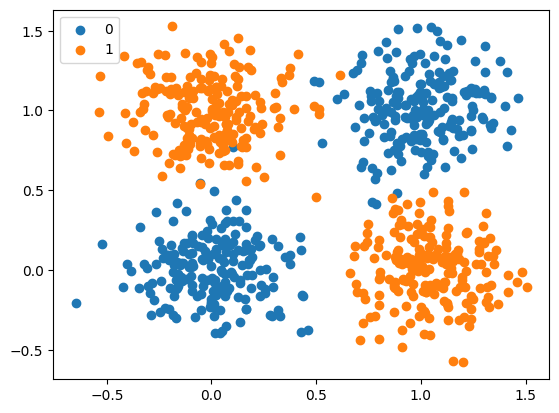

In [219]:
X, y = create_xor_dataset(num_samples_per_class=200, noise=0.2)

x0 = X[y == 0, :]
x1 = X[y == 1, :]

print(X.shape, y.shape)

plt.figure()
plt.scatter(x0[:, 0], x0[:, 1], label="0")
plt.scatter(x1[:, 0], x1[:, 1], label="1")
plt.legend()

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(640, 2) (160, 2) (640,) (160,)
(array([0., 1.]), array([313, 327], dtype=int64))
(array([0., 1.]), array([87, 73], dtype=int64))


#### Datasets & Dataloaders

In PyTorch, `datasets` and `dataloaders` are integral components for efficiently managing and loading data during the training and evaluation of machine learning models. A dataset in PyTorch is essentially a container for your data, and a dataloader is responsible for efficiently iterating over the dataset in batches during training.

In [221]:
from torch.utils.data import TensorDataset, Dataset, DataLoader

train_dataset = TensorDataset(torch.FloatTensor(X_train), torch.LongTensor(y_train))
test_dataset = TensorDataset(torch.FloatTensor(X_test), torch.LongTensor(y_test))

print("Train/Test elements: ", len(train_dataset), len(test_dataset))

Train/Test elements:  640 160


In [223]:
batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)  # shuffle=True -> randomizes the ordering of elements after each epoch
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [224]:
for i, batch in enumerate(test_loader):
    xi, yi = batch
    print(f"Batch {i}: ", xi.shape, yi.shape)

Batch 0:  torch.Size([64, 2]) torch.Size([64])
Batch 1:  torch.Size([64, 2]) torch.Size([64])
Batch 2:  torch.Size([32, 2]) torch.Size([32])


Custom datasets in PyTorch offer the flexibility to handle diverse data formats, apply specific data manipulations, and seamlessly integrate domain-specific features.

In [225]:
class CustomDataset(Dataset):
    def __init__(self, features, labels, transform=None):
        self.features = torch.FloatTensor(features)
        self.labels = torch.LongTensor(labels)
        self.transform = transform

    def __len__(self):
        return len(self.features)

    def __getitem__(self, index):
        sample = (self.features[index], self.labels[index])

        if self.transform:
            sample = self.transform(sample)

        return sample

In the above, the `CustomDataset` class is a subclass of `Dataset`, containing inputs `X` and outputs `y`. The `__getitem__` method in CustomDataset retrieves a sample, and the custom transformation is applied.

In [ ]:
class CustomTransform:
    def __init__(self, coeff=-0.5, bias=1):
        self.coeff = coeff
        self.bias = bias

    def __call__(self, sample):
        x, y = sample
        
        x_ = x * self.coeff + self.bias
        y_ = nn.functional.one_hot(y, num_classes=2)

        return (x_, y_)

custom_test_dataset = CustomDataset(X_test, y_test, transform=CustomTransform())
custom_test_dataloader = DataLoader(custom_test_dataset, batch_size=batch_size, shuffle=True)
for batch in custom_test_dataloader:
    xi, yi = batch
    print(xi.shape, yi.shape)
    print(np.unique(xi))

#### Defining a NN class

In PyTorch, constructing models begins with defining a custom class that inherits from `nn.Module`. This class encapsulates the architecture by incorporating various layers, which can be either pre-defined PyTorch modules, like `nn.Linear`, or custom layers (see `CustomLinear` from `customs.py`). The `__init__` method of the class is used to initialize these layers, setting parameters such as input and output sizes. The core computation occurs in the `forward` method, where the forward pass through the network is specified, including the sequence of layers and any activation functions. 

In [229]:
from customs import CustomLinear

class FeedForwardNetwork_linear(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, use_custom=False):
        super(FeedForwardNetwork_linear, self).__init__()

        if use_custom:
            self.fc1 = CustomLinear(input_size, hidden_size)
            self.fc2 = CustomLinear(hidden_size, output_size)
        else:
            self.fc1 = nn.Linear(input_size, hidden_size)
            self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Forward pass without activation functions
        # Input data looks like this (batch_size, number_of_features)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

##### Observation: we'll not be using Softmax after the final layer! PyTorch's *torch.nn.CrossEntropyLoss()* expects *unnormalized* output vectors

#### Defining a Training/Validation Step

In [230]:
from tqdm import tqdm

def iterate(model, dataloader, optimizer, loss_fn, is_training=True, device='cuda'):
    # Set the model to training mode if it's a training step, otherwise to evaluation mode
    model.train() if is_training else model.eval()

    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for inputs, labels in tqdm(dataloader, position=0, leave=True):
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)

        # Calculate loss if it's a training step
        loss = loss_fn(outputs, labels) 

        # Backward pass and optimization if it's a training step
        if is_training:
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)

        # Cumulative loss for reporting
        total_loss += loss.item()

    # Calculate average loss and accuracy
    avg_loss = total_loss / len(dataloader)
    accuracy = correct_predictions / total_samples if total_samples > 0 else None

    return avg_loss, accuracy

#### Training

Define model and training hyperparameters:

In [231]:
input_size = 2
hidden_size = 16
output_size = 2

epochs = 50
learning_rate = 1e-2
print_frequency = 5

In [232]:
model = FeedForwardNetwork_linear(input_size, hidden_size, output_size, use_custom=False)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
loss = nn.CrossEntropyLoss()

In [235]:
for e in range(1, epochs + 1):
    train_loss, train_acc = iterate(model, train_loader, optimizer, loss, device="cpu")
    test_loss, test_acc = iterate(model, test_loader, optimizer, loss, is_training=False, device="cpu")

    if e % print_frequency == 0:
        print(f"Epoch {e}/{epochs}: train_loss={train_loss} train_acc={train_acc} test_loss={test_loss} test_acc={test_acc}")

100%|███████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 748.67it/s]


Epoch 5/50: train_loss=0.6934993088245391 train_acc=0.484375 test_loss=0.6973452766736349 test_acc=0.45


100%|███████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 428.59it/s]


Epoch 10/50: train_loss=0.6953044235706329 train_acc=0.4984375 test_loss=0.6960368752479553 test_acc=0.44375


100%|███████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 750.05it/s]


Epoch 15/50: train_loss=0.6931467354297638 train_acc=0.534375 test_loss=0.6963841319084167 test_acc=0.5


100%|███████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 600.04it/s]


Epoch 20/50: train_loss=0.6931441187858581 train_acc=0.49375 test_loss=0.6963638265927633 test_acc=0.45


100%|██████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 1000.15it/s]


Epoch 25/50: train_loss=0.6931207001209259 train_acc=0.546875 test_loss=0.6970866521199545 test_acc=0.575


100%|██████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 1000.63it/s]


Epoch 30/50: train_loss=0.6934544444084167 train_acc=0.4578125 test_loss=0.6967042287190756 test_acc=0.4


100%|███████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 939.94it/s]


Epoch 35/50: train_loss=0.6936162233352661 train_acc=0.503125 test_loss=0.6976672410964966 test_acc=0.44375


100%|███████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 749.30it/s]


Epoch 40/50: train_loss=0.6929248571395874 train_acc=0.4140625 test_loss=0.6970563133557638 test_acc=0.36875


100%|███████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 750.68it/s]


Epoch 45/50: train_loss=0.693237179517746 train_acc=0.475 test_loss=0.6974255641301473 test_acc=0.43125


100%|███████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 750.23it/s]

Epoch 50/50: train_loss=0.6931728541851043 train_acc=0.534375 test_loss=0.6947387258211771 test_acc=0.45625


#### Visualizing Decision Boundaries

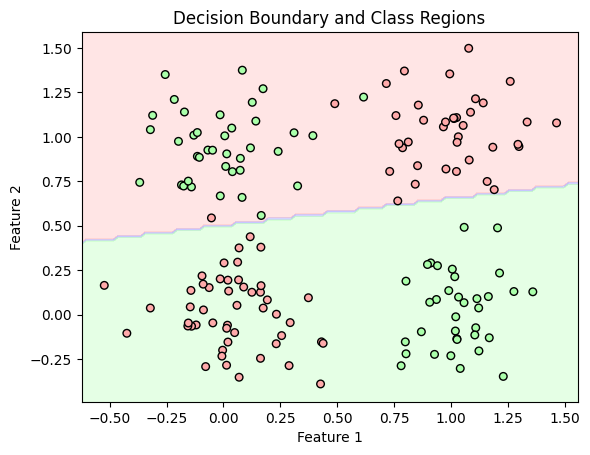

In [236]:
import utils
import importlib
importlib.reload(utils)
from utils import plot_decision_boundary

plot_decision_boundary(model, test_loader)

Adding some non-linearity:

In [237]:
class FeedForwardNetwork_nonlinear(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, use_custom=False):
        super(FeedForwardNetwork_nonlinear, self).__init__()

        self.activation = nn.ReLU()
        if use_custom:
            self.fc1 = CustomLinear(input_size, hidden_size)
            self.fc2 = CustomLinear(hidden_size, output_size)
        else:
            self.fc1 = nn.Linear(input_size, hidden_size)
            self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Forward pass without activation functions
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        
        return x

100%|███████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 599.96it/s]


Epoch 20/50: train_loss=0.6148382008075715 train_acc=0.728125 test_loss=0.626081665356954 test_acc=0.6625


100%|███████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 997.61it/s]


Epoch 40/50: train_loss=0.47094046473503115 train_acc=0.9015625 test_loss=0.49253855148951214 test_acc=0.85


100%|███████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 750.19it/s]


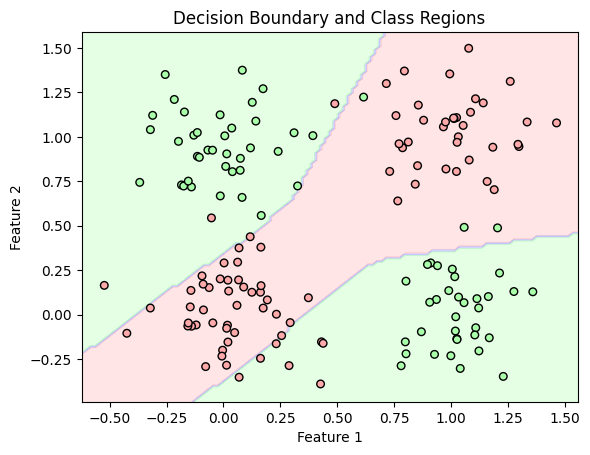

In [239]:
model = FeedForwardNetwork_nonlinear(input_size, hidden_size, output_size, use_custom=False)

epochs = 50
learning_rate = 1e-3
print_frequency = 20

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
loss = nn.CrossEntropyLoss()

for e in range(1, epochs + 1):
    train_loss, train_acc = iterate(model, train_loader, optimizer, loss, device="cpu")
    test_loss, test_acc = iterate(model, test_loader, optimizer, loss, is_training=False, device="cpu")

    if e % print_frequency == 0:
        print(f"Epoch {e}/{epochs}: train_loss={train_loss} train_acc={train_acc} test_loss={test_loss} test_acc={test_acc}")

plot_decision_boundary(model, test_loader)

### CIFAR-10 classification <a class="anchor" id="cifar10"></a>

In [240]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10

transform = transforms.Compose([
    # transforms.Resize((16, 16)),
    # transforms.Grayscale(),
    transforms.ToTensor(), 
    transforms.Normalize(0.5, 0.5),
])

cifar10_train = CIFAR10(root='./data', train=True, download=True, transform=transform)
cifar10_test = CIFAR10(root='./data', train=False, download=True, transform=transform)

print("Train images: ", len(cifar10_train))
print("Test images: ", len(cifar10_test))
image, label = cifar10_train[0]
print("Image size: ", image.shape)
print("Label to index mapping: ", cifar10_train.class_to_idx)

Files already downloaded and verified
Files already downloaded and verified
Train images:  50000
Test images:  10000
Image size:  torch.Size([1, 16, 16])
Label to index mapping:  {'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


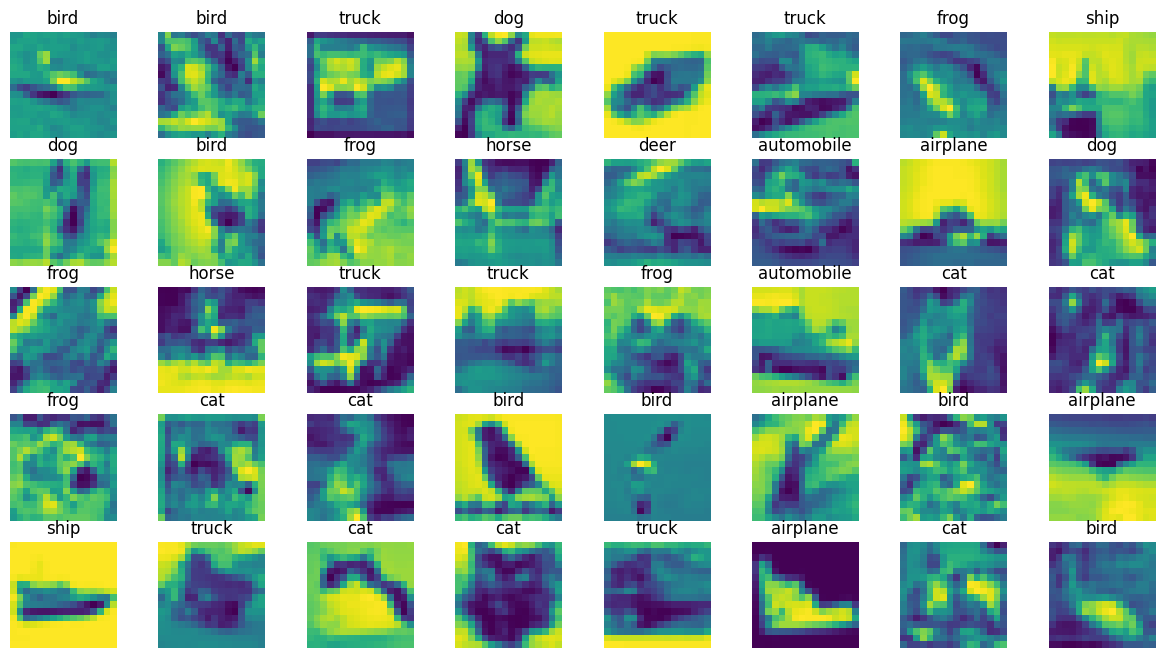

In [241]:
!pip install importlib
import importlib
import utils
importlib.reload(utils)
from utils import plot_random_images

plot_random_images(cifar10_train, rows=5, columns=8)

In [242]:
from torch.utils.data import DataLoader

batch_size = 256

cifar10_train_loader = DataLoader(cifar10_train, batch_size=batch_size, shuffle=True)
cifar10_test_loader = DataLoader(cifar10_test, batch_size=batch_size, shuffle=False)

print("Number of train batches: ", len(cifar10_train_loader))
print("Number of test batches: ", len(cifar10_test_loader))

Number of train batches:  196
Number of test batches:  40


#### TODO: Write a custom fully-connected NN with an arbitrary number of layers, with different widths, and arbitrary activation functions in-between

Note: you can use torch.nn.Sequential or torch.nn.ModuleList() to store an arbitrary number of Linear operators and activation functions

In [243]:
import torch.nn as nn

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: define a generic class of FC NN
class GenericFCNN(nn.Module):
    def __init__(self, 
                 input_size, 
                 output_size, 
                 hidden_sizes=[], 
                 activation_fn=nn.ReLU(),
                 input_flatten=True,
                 *args, **kwargs):
        super(GenericFCNN, self).__init__(*args, **kwargs)

        if input_flatten:
            self.input_transform = nn.Flatten(start_dim=1)
        else:
            self.input_transform = nn.Identity()
        
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_sizes = hidden_sizes
        self.activation_fn = activation_fn

        if isinstance(hidden_sizes, int):
            self.hidden_sizes = [hidden_sizes]
        
        modules = []
        in_size = self.input_size
        for i in range(len(self.hidden_sizes)):
            modules.append(nn.Linear(in_size, self.hidden_sizes[i]))
            modules.append(activation_fn)

            in_size = self.hidden_sizes[i]

        out = nn.Linear(self.hidden_sizes[-1], output_size)
        modules.append(out)
        
        self.network = nn.Sequential(*modules)
    
    def forward(self, x):
        x = self.input_transform(x)
        y = self.network(x)

        return y
# ***************************************************

Define model hyperparameters:

In [244]:
input_size = 1 * 16 * 16
output_size = 10
hidden_sizes = [128, 64]
activation_fn = nn.ReLU()

In [245]:
model = GenericFCNN(input_size, output_size, hidden_sizes, activation_fn)

In [246]:
!pip install torchsummary
from torchsummary import summary

summary(model, (1, 16, 16), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 256]               0
            Linear-2                  [-1, 128]          32,896
              ReLU-3                  [-1, 128]               0
              ReLU-4                  [-1, 128]               0
            Linear-5                   [-1, 64]           8,256
              ReLU-6                   [-1, 64]               0
              ReLU-7                   [-1, 64]               0
            Linear-8                   [-1, 10]             650
Total params: 41,802
Trainable params: 41,802
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.16
Estimated Total Size (MB): 0.17
----------------------------------------------------------------



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [247]:
lr = 1e-3
epochs = 25
print_frequency = 1

In [248]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(f"Using {device}.")

Using cuda.


Save the model when train loss decreases:

In [249]:
import os
from tqdm import tqdm

best_loss = torch.inf

train_losses = []
test_losses = []

model = model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=lr)
loss = nn.CrossEntropyLoss()

# Define root folder and file_name for saving
folder_path = "models/cifar10"
file_name = "model.pth"
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

for e in tqdm(range(1, epochs + 1)):
    train_loss, train_acc = iterate(model, cifar10_train_loader, optimizer, loss, device=device)
    test_loss, test_acc = iterate(model, cifar10_test_loader, optimizer, loss, is_training=False, device=device)

    train_losses.append(train_loss)
    test_losses.append(test_loss)
    
    if train_loss < best_loss:
        best_loss = train_loss

        checkpoint = {'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict()}
        torch.save(checkpoint, os.path.join(folder_path, file_name))
    
    if e % print_frequency == 0:
        print(f"Epoch {e}/{epochs}: train_loss={train_loss} train_acc={train_acc} test_loss={test_loss} test_acc={test_acc}")

  4%|███▏                                                                           | 1/25 [00:20<08:21, 20.92s/it]

Epoch 1/25: train_loss=1.9858539670097584 train_acc=0.29116 test_loss=1.8512437105178834 test_acc=0.3453


  8%|██████▎                                                                        | 2/25 [00:41<07:55, 20.67s/it]

Epoch 2/25: train_loss=1.8027688301339442 train_acc=0.36436 test_loss=1.7581742346286773 test_acc=0.3793


 12%|█████████▍                                                                     | 3/25 [01:02<07:37, 20.79s/it]

Epoch 3/25: train_loss=1.7225047733102525 train_acc=0.39534 test_loss=1.6947923243045806 test_acc=0.3991


 16%|████████████▋                                                                  | 4/25 [01:23<07:22, 21.07s/it]

Epoch 4/25: train_loss=1.6635069013858328 train_acc=0.41584 test_loss=1.6607132315635682 test_acc=0.4041


 20%|███████████████▊                                                               | 5/25 [01:44<07:00, 21.03s/it]

Epoch 5/25: train_loss=1.61995161127071 train_acc=0.43026 test_loss=1.6336853086948395 test_acc=0.418


 24%|██████████████████▉                                                            | 6/25 [02:06<06:40, 21.10s/it]

Epoch 6/25: train_loss=1.584874443861903 train_acc=0.44334 test_loss=1.6181049197912216 test_acc=0.4246


 28%|██████████████████████                                                         | 7/25 [02:26<06:17, 20.96s/it]

Epoch 7/25: train_loss=1.558686723514479 train_acc=0.45378 test_loss=1.6078547894954682 test_acc=0.4264


 32%|█████████████████████████▎                                                     | 8/25 [02:47<05:52, 20.76s/it]

Epoch 8/25: train_loss=1.5364120371487675 train_acc=0.46058 test_loss=1.5934726238250732 test_acc=0.4316


 36%|████████████████████████████▍                                                  | 9/25 [03:06<05:27, 20.50s/it]

Epoch 9/25: train_loss=1.5109895108913889 train_acc=0.47014 test_loss=1.5763105869293212 test_acc=0.4369


 40%|███████████████████████████████▏                                              | 10/25 [03:27<05:05, 20.40s/it]

Epoch 10/25: train_loss=1.4923425122183196 train_acc=0.4736 test_loss=1.5753672629594804 test_acc=0.4372


 44%|██████████████████████████████████▎                                           | 11/25 [03:47<04:47, 20.52s/it]

Epoch 11/25: train_loss=1.476562189812563 train_acc=0.48138 test_loss=1.575903406739235 test_acc=0.4421


 48%|█████████████████████████████████████▍                                        | 12/25 [04:09<04:30, 20.82s/it]

Epoch 12/25: train_loss=1.4596512968442878 train_acc=0.48672 test_loss=1.5633731931447983 test_acc=0.4479


 52%|████████████████████████████████████████▌                                     | 13/25 [04:30<04:09, 20.77s/it]

Epoch 13/25: train_loss=1.4452413363116128 train_acc=0.49174 test_loss=1.5598621904850005 test_acc=0.4486


 56%|███████████████████████████████████████████▋                                  | 14/25 [04:51<03:51, 21.02s/it]

Epoch 14/25: train_loss=1.4292833142134609 train_acc=0.49658 test_loss=1.5564721316099166 test_acc=0.4561


 60%|██████████████████████████████████████████████▊                               | 15/25 [05:12<03:28, 20.88s/it]

Epoch 15/25: train_loss=1.4173910155588267 train_acc=0.50152 test_loss=1.5703194111585617 test_acc=0.4495


 64%|█████████████████████████████████████████████████▉                            | 16/25 [05:33<03:08, 20.93s/it]

Epoch 16/25: train_loss=1.405188235701347 train_acc=0.50642 test_loss=1.5618386059999465 test_acc=0.4522


 68%|█████████████████████████████████████████████████████                         | 17/25 [05:53<02:46, 20.82s/it]

Epoch 17/25: train_loss=1.3961227554447797 train_acc=0.50866 test_loss=1.5489468902349472 test_acc=0.4561


 72%|████████████████████████████████████████████████████████▏                     | 18/25 [06:14<02:26, 20.88s/it]

Epoch 18/25: train_loss=1.3840872925155017 train_acc=0.51252 test_loss=1.5452903389930726 test_acc=0.4578


 76%|███████████████████████████████████████████████████████████▎                  | 19/25 [06:35<02:05, 20.94s/it]

Epoch 19/25: train_loss=1.371039284127099 train_acc=0.51802 test_loss=1.5390716284513473 test_acc=0.4557


 80%|██████████████████████████████████████████████████████████████▍               | 20/25 [06:57<01:45, 21.08s/it]

Epoch 20/25: train_loss=1.3605429822084856 train_acc=0.5235 test_loss=1.5431566208600997 test_acc=0.4566


 84%|█████████████████████████████████████████████████████████████████▌            | 21/25 [07:19<01:25, 21.43s/it]

Epoch 21/25: train_loss=1.3519493225885897 train_acc=0.52364 test_loss=1.546795555949211 test_acc=0.4591


 88%|████████████████████████████████████████████████████████████████████▋         | 22/25 [07:40<01:03, 21.24s/it]

Epoch 22/25: train_loss=1.3436040482958969 train_acc=0.52588 test_loss=1.5551066517829895 test_acc=0.4565


 92%|███████████████████████████████████████████████████████████████████████▊      | 23/25 [08:01<00:42, 21.25s/it]

Epoch 23/25: train_loss=1.3316810909582644 train_acc=0.53216 test_loss=1.546097919344902 test_acc=0.456


 96%|██████████████████████████████████████████████████████████████████████████▉   | 24/25 [08:22<00:21, 21.26s/it]

Epoch 24/25: train_loss=1.323190518787929 train_acc=0.53462 test_loss=1.547805029153824 test_acc=0.4576


100%|██████████████████████████████████████████████████████████████████████████████| 25/25 [08:44<00:00, 20.96s/it]

Epoch 25/25: train_loss=1.3129340574449422 train_acc=0.53814 test_loss=1.5515809923410415 test_acc=0.4607


#### Visualizing Abstract Features

##### 1. Obtain Learned features for each image

In [250]:
penultimate_layer = model.network[:-1]
input_transform = nn.Flatten(start_dim=1)

penultimate_layer

Sequential(
  (0): Linear(in_features=256, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
)

In [251]:
all_features = None
all_labels = None

with torch.no_grad():
    for images, labels in cifar10_train_loader:
        images, labels = images.to(device), labels.to(device)
        
        flattened = input_transform(images)
        features = penultimate_layer(flattened)

        if all_features is None:
            all_features = features.cpu().numpy()
            all_labels = labels.cpu().numpy()
        else:
            all_features = np.vstack((all_features, features.cpu().numpy()))
            all_labels = np.hstack((all_labels, labels.cpu().numpy()))

In [252]:
all_features.shape, all_labels.shape

((50000, 64), (50000,))

##### 2. Reduce Dimensionality

**t-SNE** is a statistical method for visualizing high-dimensional data by giving each datapoint a 
location in a two or three-dimensional map t-SNE constructs a probability distribution over pairs of high-dimensional objects in such a way that 
similar objects are assigned a higher probability while dissimilar points are assigned a lower probability..

$$p_{j \mid i}=\frac{\exp \left(-\left\|x_i-x_j\right\|^2 / 2 \sigma_i^2\right)}{\sum_{k \neq i} \exp \left(-\left\|x_i-x_k\right\|^2 / 2 \sigma_i^2\right)}, \forall x_i, x_j\, \text{two data points, and let}\, p_{i j}=\frac{p_{j \mid i}+p_{i \mid j}}{2 N}$$

t-SNE aims to learn d-dimensional mapings $y_1,\dots,y_N$ (where d is chosen 2 or 3) that reflects these similarities. It measures similarities $q_{ij}$ between two points $y_i$ and $y_j$ 
usin a similar formula, and learns the locations $y$ by  minimizing the Kullback-Leibler divergencebetween the two distributions::g.

$$\mathrm{KL}[P \| Q]=\sum_{i \neq j} p_{i j} \log \frac{p_{i j}}{q_{i j}}$$

In [253]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
reduced_features = tsne.fit_transform(all_features)

In [254]:
reduced_features.shape

(50000, 2)

##### 3. Plot

In [255]:
labels_idx = [(k, v) for k, v in cifar10_train.class_to_idx.items()]
class_labels = [x[0] for x in labels_idx]
class_idx = [x[1] for x in labels_idx]

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5316\1473954971.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('tab10', len(class_idx))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_5316\1473954971.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(reduced_features[mask, 0], reduced_features[mask, 1], c=cmap(c), label=class_labels[i], s=5)


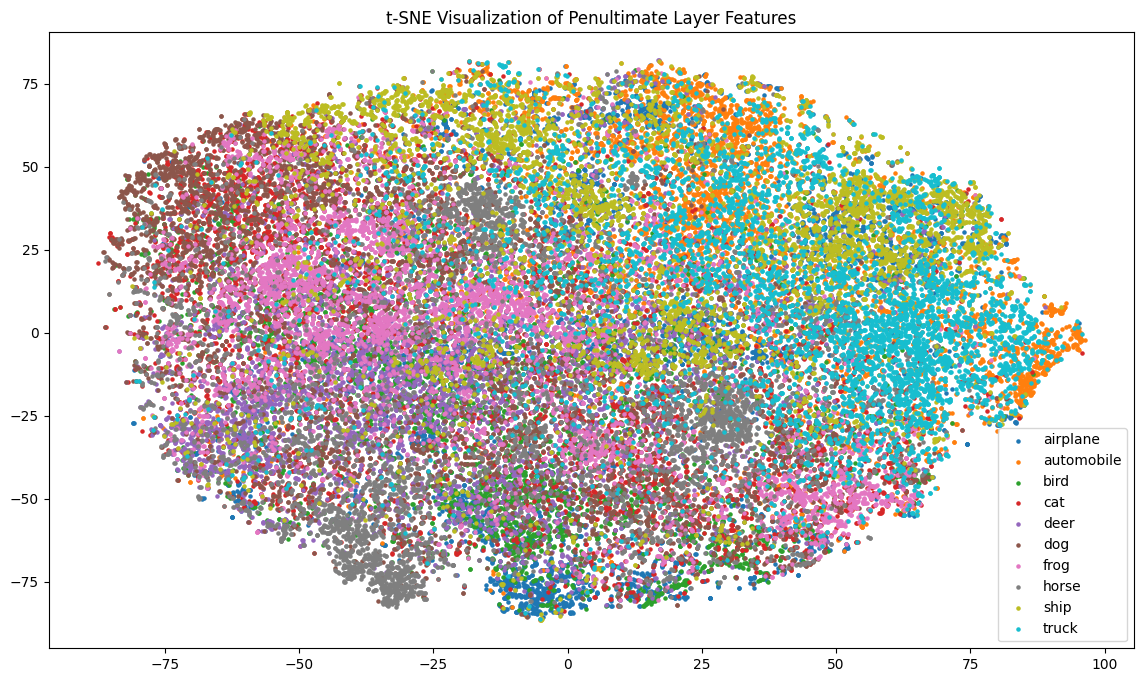

In [256]:
import matplotlib
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

fig, ax = plt.subplots(figsize=(14, 8))
cmap = matplotlib.cm.get_cmap('tab10', len(class_idx))
for i, c in enumerate(class_idx):
    mask = (all_labels == c)
    cs = [c] * np.sum(mask)
    ax.scatter(reduced_features[mask, 0], reduced_features[mask, 1], c=cmap(c), label=class_labels[i], s=5)
ax.legend()
plt.title('t-SNE Visualization of Penultimate Layer Features')
plt.show()

#### Exercise: Use the reduced features (or even the full penultimate layers' features) to fit a clustering algorithm and observe its performance w.r.t. different hyperparameters

- You can use any library (e.g. [sklearn](https://scikit-learn.org/stable/modules/clustering.html), [scipy](https://docs.scipy.org/doc/scipy/reference/cluster.html))
- How to assign, after clustering, the class for each cluster?
- What distance to use when comparing 2 feature vectors?

In [ ]:
# ***************************************************
# INSERT YOUR CODE HERE
# TODO: fit a clustering algorithm on the abstract learned features
...
# ***************************************************

### Speech Command Classification <a class="anchor" id="speech"></a>

In this exercise, we'll classify [Speech Commands](https://arxiv.org/abs/1804.03209), containing 105 829 utterances, from which we'll extract 4 classes:
- "Up"
- "Down"
- "Left"
- "Right"

**Note**: *PyTorch changed the method to handle [backends](https://github.com/facebookresearch/demucs/issues/570) in 2.1.0*, *a torch version of 2.0.1 is recommended for loading the dataset*

In [257]:
!pip show torchaudio

Name: torchaudio
Version: 2.0.2+cu118
Summary: An audio package for PyTorch
Home-page: https://github.com/pytorch/audio
Author: Soumith Chintala, David Pollack, Sean Naren, Peter Goldsborough, Moto Hira, Caroline Chen, Jeff Hwang, Zhaoheng Ni, Xiaohui Zhang
Author-email: soumith@pytorch.org
License: 
Location: c:\users\lenovo\.virtualenvs\abba-torch\lib\site-packages
Requires: torch
Required-by: 


In [258]:
import torch
import torchaudio
from torchvision.datasets import DatasetFolder
from torch.utils.data import Dataset
import librosa
import os
import numpy as np

dset =  torchaudio.datasets.SPEECHCOMMANDS(root="./data", download=True)
audio_folder = "./data/SpeechCommands/"
classes = ["up", "down", "left", "right"]

In [259]:
sr = 16_000
max_length = 1  # seconds
n_max = int(max_length * sr)

In [260]:
class CustomSpeechDataset(Dataset):
    def __init__(self, root_dir, classes, n_max, transform=None):
        super().__init__()
        
        self.root_dir = root_dir
        self.classes = classes
        self.n_max = n_max
        self.file_list = []  # List to store file paths
        self.transform = transform
        self.class_indices = {}

        last_index = 0
        for c in self.classes:
            class_dir = os.path.join(self.root_dir, c)
            files = os.listdir(class_dir)
            self.file_list.extend([os.path.join(class_dir, f) for f in files])
            self.class_indices[c] = list(range(last_index, last_index + len(files))) 

            last_index += len(files)
        
        self.class_to_index = {cls: i for i, cls in enumerate(self.classes)}

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        audio_path = self.file_list[idx]
        waveform, sample_rate = librosa.load(audio_path)

        # don't do this
        if len(waveform) < self.n_max:
            # pad with 0s
            waveform = np.concatenate((waveform, [0] * (self.n_max - len(waveform))))
        else:
            waveform = waveform[:self.n_max]
        
        if self.transform:
            waveform = self.transform(waveform)

        label = self.class_to_index[os.path.basename(os.path.dirname(audio_path))]
        
        return waveform, label

In [261]:
root_dir = "./data/SpeechCommands/speech_commands_v0.02/"
speech_dataset = CustomSpeechDataset(root_dir, classes, n_max)
print(f"#utterances: {len(speech_dataset)}")
print(f"class to index: {speech_dataset.class_to_index}")
print(f"First sample: ", speech_dataset[0])

#utterances: 15219
class to index: {'up': 0, 'down': 1, 'left': 2, 'right': 3}
First sample:  (array([-0.00184824, -0.00121164, -0.0005073 , ..., -0.00345688,
       -0.0026818 , -0.00283652], dtype=float32), 0)


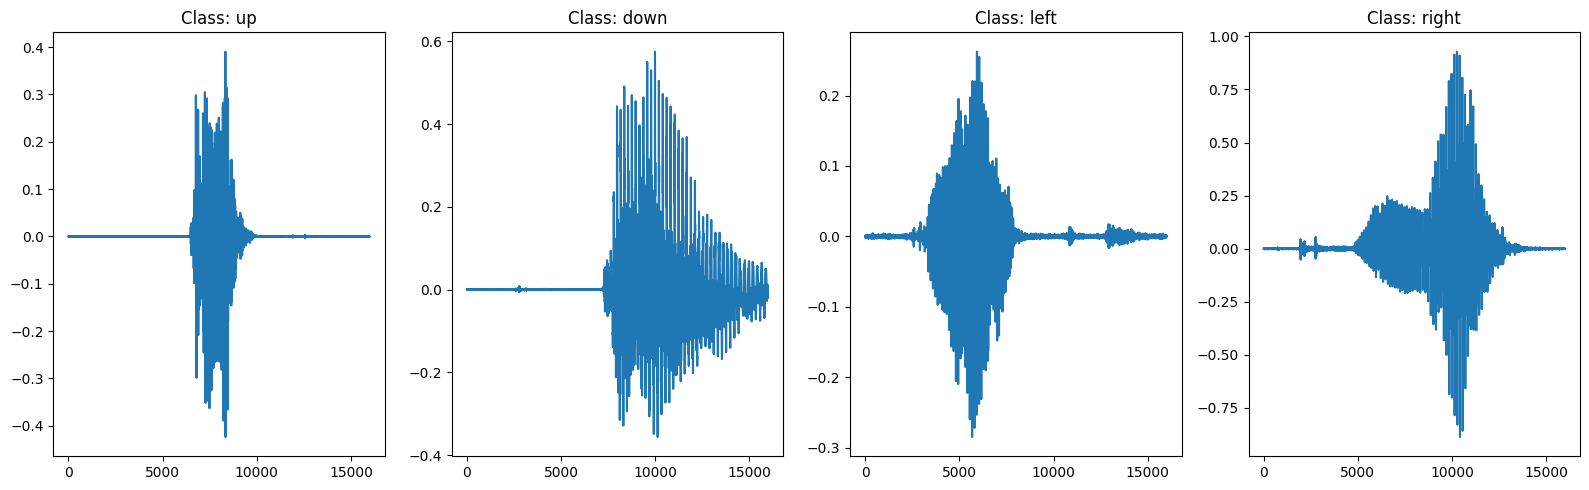

In [262]:
import importlib
import utils
importlib.reload(utils)
from utils import plot_and_listen_random

plot_and_listen_random(speech_dataset, speech_dataset.classes, speech_dataset.class_indices, sr=sr)

#### Feature Extraction

We'll use the `transform` attribute of `CustomSpeechDataset` to provide different functionalities to extract features from each loaded utterance. 

In [263]:
class MFCCTransform:
    def __init__(self, sr, n_mfcc=13, hop_length=512, win_length=2048):
        self.sr = sr
        self.n_mfcc = n_mfcc
        self.hop_length = hop_length
        self.win_length = win_length
        
    def __call__(self, waveform):
        mfcc_transform = librosa.feature.mfcc(y=waveform, sr=self.sr, n_mfcc=self.n_mfcc, hop_length=self.hop_length, win_length=self.win_length)
        return mfcc_transform

# Combine multiple transforms into a single feature vector
class MultiFeatureTransform:
    def __init__(self, sr, n_mfcc=None, zcr=True, rms=True,
                frame_length=2048, hop_length=512):
        self.transforms = []
        self.transform_names = []  
        self.feature_ranges = {}  # we'll keep track of what each element from the feature vector represent, for subsequent analysis
        
        if n_mfcc:
            mfcc_transform = MFCCTransform(sr, n_mfcc, hop_length, frame_length)
            self.transforms.append(mfcc_transform)
            self.transform_names.append("mfcc")
        
        if zcr:
            zcr_transform = lambda y: librosa.feature.zero_crossing_rate(y=y, frame_length=frame_length, hop_length=hop_length)
            self.transforms.append(zcr_transform)
            self.transform_names.append("zcr")
        
        if rms:
            rms_transform = lambda y: librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)
            self.transforms.append(rms_transform)
            self.transform_names.append("rms")

    def normalize(self, vector):
        return (vector - vector.mean(dim=1)) / vector.std(dim=1)
    
    def __call__(self, waveform):

        full_feature = None
        
        last_index = 0
        for i, tr in enumerate(self.transforms):
            feature = torch.FloatTensor(tr(waveform))
            feature = feature.view(1, -1)
            feature = self.normalize(feature)
            
            self.feature_ranges[self.transform_names[i]] = (last_index, last_index + feature.shape[1])
            last_index += feature.shape[1]

            if full_feature is not None:
                full_feature = torch.cat((full_feature, feature), dim=1)
            else:
                full_feature = feature

        return full_feature.squeeze()
            

Try adding other features: [https://librosa.org/doc/latest/feature.html#spectral-features](https://librosa.org/doc/latest/feature.html#spectral-features)

In [264]:
n_mfcc = 7
zcr=False
rms=False
window_size = 25e-3 # seconds
hop_size = 10e-3 # seconds"

window_length = int(sr * window_size)
hop_length = int(sr * hop_size)

print("Window of analysis: ", window_length)
print("Stride of analysis: ", hop_length)

transform = MultiFeatureTransform(sr=sr, 
                                  n_mfcc=n_mfcc,
                                  zcr=zcr,
                                  rms=rms, 
                                  frame_length=window_length,
                                  hop_length=hop_length)

speech_dataset_features = CustomSpeechDataset(root_dir, classes, n_max, transform=transform)

Window of analysis:  400
Stride of analysis:  160


In [265]:
from time import time

t0 = time()
sample, label = speech_dataset_features[11]
t1 = time()

print("Time to retrieve 1 sample: ", t1 - t0)
print("First sample size & label: ", sample.shape, label)
print("Feature names: ", transform.transform_names)
print("Feature ranges: ", transform.feature_ranges)

Time to retrieve 1 sample:  0.017984867095947266
First sample size & label:  torch.Size([707]) 0
Feature names:  ['mfcc']
Feature ranges:  {'mfcc': (0, 707)}


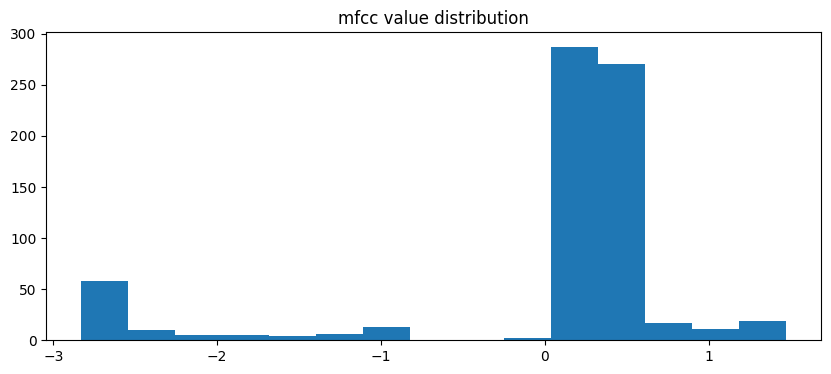

In [266]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, len(transform.transform_names), figsize=(10, 4))
if not isinstance(ax, list):
    ax = [ax]
for i, (tr, rng) in enumerate(transform.feature_ranges.items()):
    ax[i].hist(sample[rng[0]: rng[1]].view(-1).numpy(), bins=15)
    ax[i].set_title(f"{tr} value distribution")
plt.show()

#### Data Splitting & Classifier Training

In [267]:
from sklearn.model_selection import StratifiedShuffleSplit
from torch.utils.data import Subset, DataLoader
from tqdm import tqdm

test_size = 0.2
train_size = 0.5 

stratified_splitter = StratifiedShuffleSplit(n_splits=1, test_size=test_size, train_size=train_size, random_state=33)

targets = [speech_dataset_features.class_to_index[os.path.basename(os.path.dirname(file_path))] for file_path in speech_dataset_features.file_list]
train_idx, test_idx = next(stratified_splitter.split(speech_dataset_features.file_list, targets))

train_dataset_speech = Subset(speech_dataset_features, train_idx)
test_dataset_speech = Subset(speech_dataset_features, test_idx)

print("Train Dataset size: ", len(train_dataset_speech))
print("Test Dataset size: ", len(test_dataset_speech))

Train Dataset size:  7609
Test Dataset size:  3044


1000it [00:16, 62.20it/s]


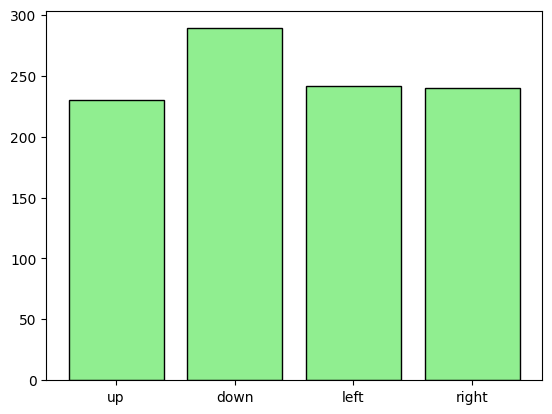

In [268]:
labels_test = [0 for _ in range(len(classes))]
for i, (sample, label) in tqdm(enumerate(test_dataset_speech)):
    labels_test[label] += 1

    if i == 1000:
        break

plt.bar([i for i in range(len(classes))], labels_test, color='lightgreen', ec='black')
plt.xticks([i for i in range(len(classes))], labels=classes)
plt.show()

In [269]:
batch_size = 128
input_size = sample.shape[0]

output_size = len(classes)
hidden_sizes = [128, 32]
activation_fn = torch.nn.ReLU()

In [270]:
train_loader_speech = DataLoader(train_dataset_speech, batch_size=batch_size, shuffle=True)
test_loader_speech = DataLoader(test_dataset_speech, batch_size=batch_size, shuffle=False)

In [271]:
print(len(train_loader_speech), len(test_loader_speech))

60 24


In [272]:
model = GenericFCNN(input_size, output_size, hidden_sizes, activation_fn, input_flatten=False)

In [273]:
from torchsummary import summary

summary(model, (input_size,), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
          Identity-1                  [-1, 707]               0
            Linear-2                  [-1, 128]          90,624
              ReLU-3                  [-1, 128]               0
              ReLU-4                  [-1, 128]               0
            Linear-5                   [-1, 32]           4,128
              ReLU-6                   [-1, 32]               0
              ReLU-7                   [-1, 32]               0
            Linear-8                    [-1, 4]             132
Total params: 94,884
Trainable params: 94,884
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.36
Estimated Total Size (MB): 0.37
----------------------------------------------------------------


In [274]:
lr = 1e-3
epochs = 15
print_frequency = 1

In [275]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    torch.cuda.empty_cache() 
else:
    device = torch.device('cpu')
print(f"Using {device}.")

Using cuda.


In [276]:
best_loss = torch.inf

train_losses = []
test_losses = []

model = model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=lr)
loss = nn.CrossEntropyLoss()

# Define root folder and file_name for saving
folder_path = "models/speech"
file_name = "model.pth"
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

for e in tqdm(range(1, epochs + 1)):
    train_loss, train_acc = iterate(model, train_loader_speech, optimizer, loss, device=device)
    test_loss, test_acc = iterate(model, test_loader_speech, optimizer, loss, is_training=False, device=device)

    train_losses.append(train_loss)
    test_losses.append(test_loss)
    
    if train_loss < best_loss:
        best_loss = train_loss

        checkpoint = {'state_dict': model.state_dict(),'optimizer' :optimizer.state_dict()}
        torch.save(checkpoint, os.path.join(folder_path, file_name))
    
    if e % print_frequency == 0:
        print(f"Epoch {e}/{epochs}: train_loss={train_loss} train_acc={train_acc} test_loss={test_loss} test_acc={test_acc}")

  7%|█████▏                                                                        | 1/15 [02:49<39:39, 169.94s/it]

Epoch 1/15: train_loss=1.311009172598521 train_acc=0.39032724405309505 test_loss=1.2157323211431503 test_acc=0.46944809461235215


 13%|██████████▍                                                                   | 2/15 [05:00<31:50, 146.94s/it]

Epoch 2/15: train_loss=1.1389292110999425 train_acc=0.5229333683795505 test_loss=1.0812685117125511 test_acc=0.5765440210249672


 20%|███████████████▌                                                              | 3/15 [07:02<27:03, 135.27s/it]

Epoch 3/15: train_loss=1.0298219551642736 train_acc=0.5837823629911947 test_loss=1.007711502412955 test_acc=0.5946123521681997


 27%|████████████████████▊                                                         | 4/15 [09:07<24:02, 131.17s/it]

Epoch 4/15: train_loss=0.9471909960110982 train_acc=0.6207123143645683 test_loss=0.9331296260158221 test_acc=0.628777923784494


 33%|██████████████████████████                                                    | 5/15 [11:09<21:20, 128.06s/it]

Epoch 5/15: train_loss=0.8928328981002172 train_acc=0.6366145354185833 test_loss=0.8642191737890244 test_acc=0.6514454664914586


 40%|███████████████████████████████▏                                              | 6/15 [13:17<19:10, 127.85s/it]

Epoch 6/15: train_loss=0.8316436072190603 train_acc=0.6630306216322776 test_loss=0.796357236802578 test_acc=0.681011826544021


 47%|████████████████████████████████████▍                                         | 7/15 [15:25<17:05, 128.21s/it]

Epoch 7/15: train_loss=0.772077186902364 train_acc=0.6965435668287554 test_loss=0.7492960095405579 test_acc=0.7007227332457293


 53%|█████████████████████████████████████████▌                                    | 8/15 [17:34<14:57, 128.20s/it]

Epoch 8/15: train_loss=0.7113565782705943 train_acc=0.718622683664082 test_loss=0.7099210371573766 test_acc=0.7220762155059133


 60%|██████████████████████████████████████████████▊                               | 9/15 [19:39<12:43, 127.26s/it]

Epoch 9/15: train_loss=0.6795757999022801 train_acc=0.733736364831121 test_loss=0.7039727941155434 test_acc=0.7109067017082786


 67%|███████████████████████████████████████████████████▎                         | 10/15 [21:46<10:35, 127.16s/it]

Epoch 10/15: train_loss=0.6608804071942965 train_acc=0.733604941516625 test_loss=0.6916914780934652 test_acc=0.7135348226018396


 73%|████████████████████████████████████████████████████████▍                    | 11/15 [23:53<08:29, 127.25s/it]

Epoch 11/15: train_loss=0.626231328646342 train_acc=0.7484557760546721 test_loss=0.6331645175814629 test_acc=0.7532851511169514


 80%|█████████████████████████████████████████████████████████████▌               | 12/15 [26:02<06:23, 127.69s/it]

Epoch 12/15: train_loss=0.6044895261526108 train_acc=0.7580496780128795 test_loss=0.6250090139607588 test_acc=0.7562417871222076


 87%|██████████████████████████████████████████████████████████████████▋          | 13/15 [28:11<04:16, 128.05s/it]

Epoch 13/15: train_loss=0.5875895852843921 train_acc=0.7694835063740307 test_loss=0.6255466006696224 test_acc=0.7503285151116952


 93%|███████████████████████████████████████████████████████████████████████▊     | 14/15 [30:19<02:08, 128.00s/it]

Epoch 14/15: train_loss=0.5648829653859139 train_acc=0.7765803653568143 test_loss=0.6148632404704889 test_acc=0.7608409986859396


100%|█████████████████████████████████████████████████████████████████████████████| 15/15 [32:24<00:00, 129.67s/it]

Epoch 15/15: train_loss=0.5384374385078748 train_acc=0.7914311998948613 test_loss=0.5634115400413672 test_acc=0.7838370565045992


#### Visualizing Feature Sensitivity (Optional)

[**Gradient-weighted Class Activation 
Mapping (Grad-CAM**](https://openaccess.thecvf.com/content_ICCV_2017/papers/Selvaraju_Grad-CAM_Visual_Explanations_ICCV_2017_paper.pdf) is a technique used for visualizing and understanding the decisions made by a neural network, particularly in the context of image classification tasks. It helps highlight the regions of an input that are important for a deep neural network's prediction. 

Up until now, we've automatically computed gradients of the loss w.r.t. the network weights. In order to visualize which parts of input have a higher effect on the output, we'll compute the gradients w.r.t. to each element in the input data. We'll use a simpler variant of GradCAM to construct a heatmap over the input MFCCs to our classification model.

In [ ]:
from torch.autograd import Function


def generate_grad_cam(model, input_data, label, device):
    """
    Computes the gradients of the loss w.r.t. to input_data, given a trained model and a target label.
    """
    input_data.requires_grad = True
    
    # Forward pass
    output = model(input_data.unsqueeze(0))
    target = torch.tensor([label]).to(device)
    
    # Backward pass to calculate gradients
    loss = nn.CrossEntropyLoss()(output, target)
    loss.backward()
    
    # Calculate importance weights (Gradients x Input Features)
    grad_cam_map = input_data.grad.squeeze().detach().cpu().numpy()
    
    return grad_cam_map

def plot_grad_cam_line(input_data, grad_cam_map):
    fig, ax1 = plt.subplots(figsize=(12, 3))
    
    color = 'tab:blue'
    ax1.set_xlabel('Feature index')
    ax1.set_ylabel('Feature Value', color=color)
    ax1.plot(input_data.numpy(), color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    
    color = 'tab:red'
    ax2.set_ylabel('Feature sensitivity', color=color)  # we already handled the x-label with ax1
    ax2.plot(grad_cam_map, color=color, alpha=0.5)
    ax2.tick_params(axis='y', labelcolor=color)
    
    fig.tight_layout()  # otherwise the right y-label is slightly clipped

def plot_grad_cam_heatmap(input_data, grad_cam_map, n_mfcc):

    n_frames = int(input_data.shape[0]) // n_mfcc
    
    mfcc = np.reshape(input_data.numpy(), (n_mfcc, n_frames))
    heatmap = np.reshape(grad_cam_map, (n_mfcc, n_frames))

    plt.figure(figsize=(15, 6))
    plt.subplot(2, 1, 1)
    plt.imshow(np.flip(mfcc, axis=(0, 1)), cmap="winter")
    plt.yticks([i for i in range(n_mfcc)], labels=[n_mfcc - i for i in range(n_mfcc)])
    plt.title("Normalized MFCC coefficients")
    plt.colorbar(location="bottom", shrink=0.2)
    plt.subplot(2, 1, 2)
    plt.imshow(np.flip(heatmap, axis=(0, 1)), cmap="seismic")
    plt.yticks([i for i in range(n_mfcc)], labels=[n_mfcc - i for i in range(n_mfcc)])
    plt.title("GradCAM Heatmap")
    plt.colorbar(location="bottom", shrink=0.2)
    

In [ ]:
from IPython.display import Audio

i = 68

idx_in_bigger = test_dataset_speech.indices[i]
class_to_index = test_dataset_speech.dataset.class_to_index
index_to_class = {v:k for k, v in class_to_index.items()}

mfcc_range = transform.feature_ranges["mfcc"]
idx_start, idx_stop = mfcc_range

sample, label = test_dataset_speech[i]
wav_file = test_dataset_speech.dataset.file_list[idx_in_bigger]
signal, sr = librosa.load(wav_file)

predicted = classes[torch.argmax(model.cpu()(sample))]
target = index_to_class[label]

print(f"\t\t\t\t\t\t\t Target: {target} Predicted: {predicted}")

grad_cam_map = generate_grad_cam(model.to(device), sample.to(device), label, device)

plot_grad_cam_line(sample[idx_start: idx_stop], grad_cam_map[idx_start: idx_stop])
plot_grad_cam_heatmap(sample[idx_start: idx_stop], grad_cam_map[idx_start: idx_stop], n_mfcc=n_mfcc)

plt.figure(figsize=(15, 3))
plt.plot([i / sr for i in range(len(signal))], signal)

Audio(signal, rate=sr)

You can try other feature sensitivity analysis tools: [SHAP (SHapley Additive exPlanations)](https://shap.readthedocs.io/en/latest/generated/shap.Explainer.html)